In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
%reload_ext autoreload
%autoreload 2


In [2]:
dfdeaths = pd.read_csv('../data/Casos_Diarios_Estado_Nacional_Defunciones_2021062011.csv')

In [3]:
a,b = dfdeaths.shape

In [4]:
dfdeaths.head(10)

,cve_ent,poblacion,nombre,20/01/2020,21/01/2020,22/01/2020,23/01/2020,24/01/2020,25/01/2020,26/01/2020,...,10/06/2021,11/06/2021,12/06/2021,13/06/2021,14/06/2021,15/06/2021,16/06/2021,17/06/2021,18/06/2021,19/06/2021
0,1,1434635,AGUASCALIENTES,0,0,0,0,0,0,0,...,0,1,1,2,1,2,0,0,0,0
1,2,3634868,BAJA CALIFORNIA,0,0,0,0,0,0,0,...,4,4,1,3,0,1,4,6,2,0
2,3,804708,BAJA CALIFORNIA SUR,0,0,0,0,0,0,0,...,2,6,2,1,3,1,4,2,0,0
3,4,1000617,CAMPECHE,0,0,0,0,0,0,0,...,4,0,0,4,3,0,1,1,3,0
4,7,5730367,CHIAPAS,0,0,0,0,0,0,0,...,0,0,0,1,0,1,2,1,1,0
5,8,3801487,CHIHUAHUA,0,0,0,0,0,0,0,...,3,4,2,1,4,3,2,0,1,0
6,9,9018645,DISTRITO FEDERAL,0,0,0,0,0,0,0,...,2,7,5,3,8,5,6,9,2,0
7,5,3218720,COAHUILA,0,0,0,0,0,0,0,...,0,4,0,1,0,0,1,0,0,0
8,6,785153,COLIMA,0,0,0,0,0,0,0,...,0,1,1,0,1,1,0,0,0,0
9,10,1868996,DURANGO,0,0,0,0,0,0,0,...,0,2,0,1,0,1,0,0,0,0


In [5]:
dfdeaths = dfdeaths.query("nombre != 'Nacional'").copy()

le quitamos nacional

In [6]:
dfdeaths['total'] = dfdeaths.loc[:,'20/01/2020':'19/06/2021'].sum(axis=1)



In [7]:
dfdeaths.head()

,cve_ent,poblacion,nombre,20/01/2020,21/01/2020,22/01/2020,23/01/2020,24/01/2020,25/01/2020,26/01/2020,...,11/06/2021,12/06/2021,13/06/2021,14/06/2021,15/06/2021,16/06/2021,17/06/2021,18/06/2021,19/06/2021,total
0,1,1434635,AGUASCALIENTES,0,0,0,0,0,0,0,...,1,1,2,1,2,0,0,0,0,2456
1,2,3634868,BAJA CALIFORNIA,0,0,0,0,0,0,0,...,4,1,3,0,1,4,6,2,0,8648
2,3,804708,BAJA CALIFORNIA SUR,0,0,0,0,0,0,0,...,6,2,1,3,1,4,2,0,0,1486
3,4,1000617,CAMPECHE,0,0,0,0,0,0,0,...,0,0,4,3,0,1,1,3,0,1265
4,7,5730367,CHIAPAS,0,0,0,0,0,0,0,...,0,0,1,0,1,2,1,1,0,1654


In [8]:
dfdeaths.sort_values('total', inplace=True , ascending=False)
dfdeaths.head()

,cve_ent,poblacion,nombre,20/01/2020,21/01/2020,22/01/2020,23/01/2020,24/01/2020,25/01/2020,26/01/2020,...,11/06/2021,12/06/2021,13/06/2021,14/06/2021,15/06/2021,16/06/2021,17/06/2021,18/06/2021,19/06/2021,total
14,15,17427790,MEXICO,0,0,0,0,0,0,0,...,8,4,3,3,6,4,4,2,2,37207
6,9,9018645,DISTRITO FEDERAL,0,0,0,0,0,0,0,...,7,5,3,8,5,6,9,2,0,34458
13,14,8409693,JALISCO,0,0,0,0,0,0,0,...,0,2,3,0,3,1,1,1,0,12604
20,21,6604451,PUEBLA,0,0,0,0,0,0,0,...,4,5,8,4,7,4,4,2,0,12171
10,11,6228175,GUANAJUATO,0,1,0,0,0,0,0,...,2,1,0,0,2,0,1,1,0,11079


In [9]:
dfdeaths['rates'] = (dfdeaths['total']/dfdeaths['poblacion'])*100000
dfdeaths.head()

,cve_ent,poblacion,nombre,20/01/2020,21/01/2020,22/01/2020,23/01/2020,24/01/2020,25/01/2020,26/01/2020,...,12/06/2021,13/06/2021,14/06/2021,15/06/2021,16/06/2021,17/06/2021,18/06/2021,19/06/2021,total,rates
14,15,17427790,MEXICO,0,0,0,0,0,0,0,...,4,3,3,6,4,4,2,2,37207,213.492359
6,9,9018645,DISTRITO FEDERAL,0,0,0,0,0,0,0,...,5,3,8,5,6,9,2,0,34458,382.075134
13,14,8409693,JALISCO,0,0,0,0,0,0,0,...,2,3,0,3,1,1,1,0,12604,149.874674
20,21,6604451,PUEBLA,0,0,0,0,0,0,0,...,5,8,4,7,4,4,2,0,12171,184.284810
10,11,6228175,GUANAJUATO,0,1,0,0,0,0,0,...,1,0,0,2,0,1,1,0,11079,177.885175


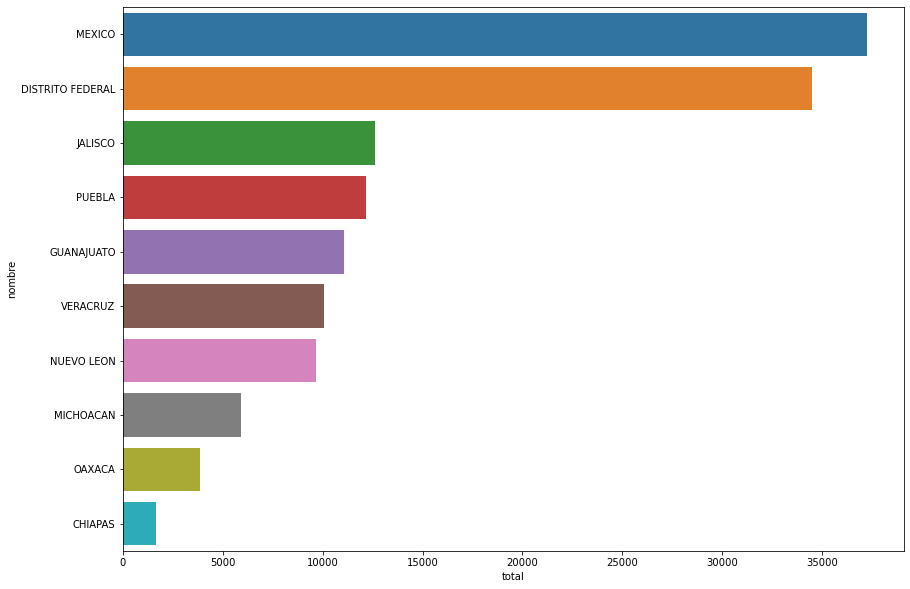

In [10]:
plt.figure(figsize=(14,10))
top10=dfdeaths.nlargest(10,'poblacion').copy()
top10.sort_values('total', inplace=True , ascending=False)
sns.barplot(x="total", y="nombre", data=top10)
sns.set_context('paper',font_scale=2)

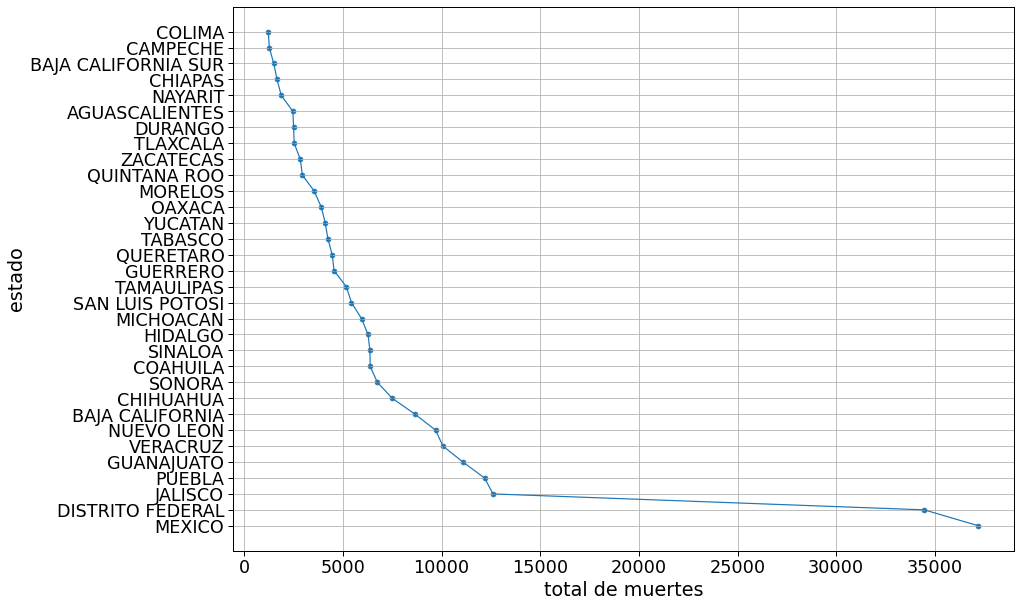

In [11]:
fig = plt.figure(figsize=(14,10))
plt.scatter(dfdeaths['total'],dfdeaths['nombre'])
plt.plot(dfdeaths['total'],dfdeaths['nombre'])
plt.xlabel('total de muertes')
plt.ylabel('estado')
plt.grid()


In [12]:
dfdeaths.keys()

Index(['cve_ent', 'poblacion', 'nombre', '20/01/2020', '21/01/2020',
       '22/01/2020', '23/01/2020', '24/01/2020', '25/01/2020', '26/01/2020',
       ...
       '12/06/2021', '13/06/2021', '14/06/2021', '15/06/2021', '16/06/2021',
       '17/06/2021', '18/06/2021', '19/06/2021', 'total', 'rates'],
      dtype='object', length=522)

In [13]:
X = dfdeaths.iloc[:,:-1].values  #independent variable array
y = dfdeaths.iloc[:,1].values  #dependent variable vector

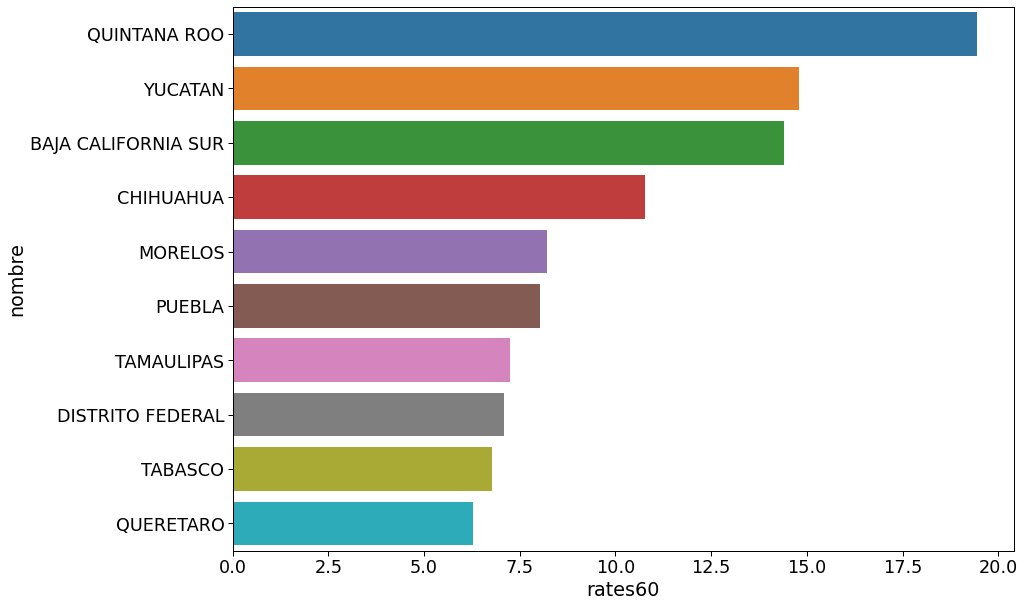

In [14]:
dfdeaths['total60']= dfdeaths.iloc[:, b -59 : b ].sum(axis=1)
dfdeaths['rates60'] = (dfdeaths['total60']/dfdeaths['poblacion'])*100000
dfdeaths
plt.figure(figsize=(14,10))
sns.barplot(x="rates60", y="nombre", data=dfdeaths.nlargest(10, 'rates60'))
sns.set_context('paper', font_scale=2)

#analisis de casos

In [15]:
dfcases = pd.read_csv('../data/Casos_Diarios_Estado_Nacional_Confirmados_20210620.csv')

In [16]:
a,b = dfcases.shape

In [17]:
dfcases.head(10)

,cve_ent,poblacion,nombre,31-12-2019,01-01-2020,02-01-2020,03-01-2020,04-01-2020,05-01-2020,06-01-2020,...,11-06-2021,12-06-2021,13-06-2021,14-06-2021,15-06-2021,16-06-2021,17-06-2021,18-06-2021,19-06-2021,20-06-2021
0,1,1434635,AGUASCALIENTES,0,0,0,0,0,0,0,...,5,0,1,10,10,3,5,1,0,0
1,2,3634868,BAJA CALIFORNIA,0,0,0,0,0,0,0,...,53,9,15,65,48,54,38,19,3,0
2,3,804708,BAJA CALIFORNIA SUR,0,0,0,0,0,0,0,...,253,146,127,367,289,295,271,170,93,4
3,4,1000617,CAMPECHE,0,0,0,0,0,0,0,...,46,26,26,79,56,76,60,41,6,0
4,7,5730367,CHIAPAS,0,0,0,0,0,0,0,...,33,20,19,48,32,29,34,26,14,0
5,8,3801487,CHIHUAHUA,0,0,0,0,0,0,0,...,32,8,15,47,43,20,15,7,0,0
6,9,9018645,DISTRITO FEDERAL,0,0,0,0,0,0,0,...,766,419,134,888,844,813,805,764,276,0
7,5,3218720,COAHUILA,0,0,0,0,0,0,0,...,19,7,5,28,31,26,24,19,3,0
8,6,785153,COLIMA,0,0,0,0,0,0,0,...,13,13,3,7,10,18,19,4,0,0
9,10,1868996,DURANGO,0,0,0,0,0,0,0,...,50,8,3,24,17,21,17,11,1,0


In [18]:
dfcases = dfcases.query("nombre != 'Nacional'").copy()

le quitamos nacional

In [19]:
dfcases['total'] = dfcases.iloc[:,3:b].sum(axis=1)



In [20]:
dfcases.head()

,cve_ent,poblacion,nombre,31-12-2019,01-01-2020,02-01-2020,03-01-2020,04-01-2020,05-01-2020,06-01-2020,...,12-06-2021,13-06-2021,14-06-2021,15-06-2021,16-06-2021,17-06-2021,18-06-2021,19-06-2021,20-06-2021,total
0,1,1434635,AGUASCALIENTES,0,0,0,0,0,0,0,...,0,1,10,10,3,5,1,0,0,26694
1,2,3634868,BAJA CALIFORNIA,0,0,0,0,0,0,0,...,9,15,65,48,54,38,19,3,0,50278
2,3,804708,BAJA CALIFORNIA SUR,0,0,0,0,0,0,0,...,146,127,367,289,295,271,170,93,4,36223
3,4,1000617,CAMPECHE,0,0,0,0,0,0,0,...,26,26,79,56,76,60,41,6,0,11081
4,7,5730367,CHIAPAS,0,0,0,0,0,0,0,...,20,19,48,32,29,34,26,14,0,12050


In [21]:
dfcases.sort_values('total', inplace=True , ascending=False)
dfcases.head()

,cve_ent,poblacion,nombre,31-12-2019,01-01-2020,02-01-2020,03-01-2020,04-01-2020,05-01-2020,06-01-2020,...,12-06-2021,13-06-2021,14-06-2021,15-06-2021,16-06-2021,17-06-2021,18-06-2021,19-06-2021,20-06-2021,total
6,9,9018645,DISTRITO FEDERAL,0,0,0,0,0,0,0,...,419,134,888,844,813,805,764,276,0,673343
14,15,17427790,MEXICO,0,0,0,0,0,0,0,...,127,54,196,174,158,159,124,40,1,256656
10,11,6228175,GUANAJUATO,0,0,0,0,0,0,0,...,18,16,48,26,35,13,18,0,0,132650
18,19,5610153,NUEVO LEON,0,0,0,0,0,0,0,...,34,22,127,118,120,95,80,32,1,126068
13,14,8409693,JALISCO,0,0,0,0,0,0,0,...,29,15,69,39,33,41,43,5,0,88130


In [22]:
dfcases['rates'] = (dfcases['total']/dfcases['poblacion'])*100000
dfcases.head()

,cve_ent,poblacion,nombre,31-12-2019,01-01-2020,02-01-2020,03-01-2020,04-01-2020,05-01-2020,06-01-2020,...,13-06-2021,14-06-2021,15-06-2021,16-06-2021,17-06-2021,18-06-2021,19-06-2021,20-06-2021,total,rates
6,9,9018645,DISTRITO FEDERAL,0,0,0,0,0,0,0,...,134,888,844,813,805,764,276,0,673343,7466.121574
14,15,17427790,MEXICO,0,0,0,0,0,0,0,...,54,196,174,158,159,124,40,1,256656,1472.682423
10,11,6228175,GUANAJUATO,0,0,0,0,0,0,0,...,16,48,26,35,13,18,0,0,132650,2129.837392
18,19,5610153,NUEVO LEON,0,0,0,0,0,0,0,...,22,127,118,120,95,80,32,1,126068,2247.140140
13,14,8409693,JALISCO,0,0,0,0,0,0,0,...,15,69,39,33,41,43,5,0,88130,1047.957399


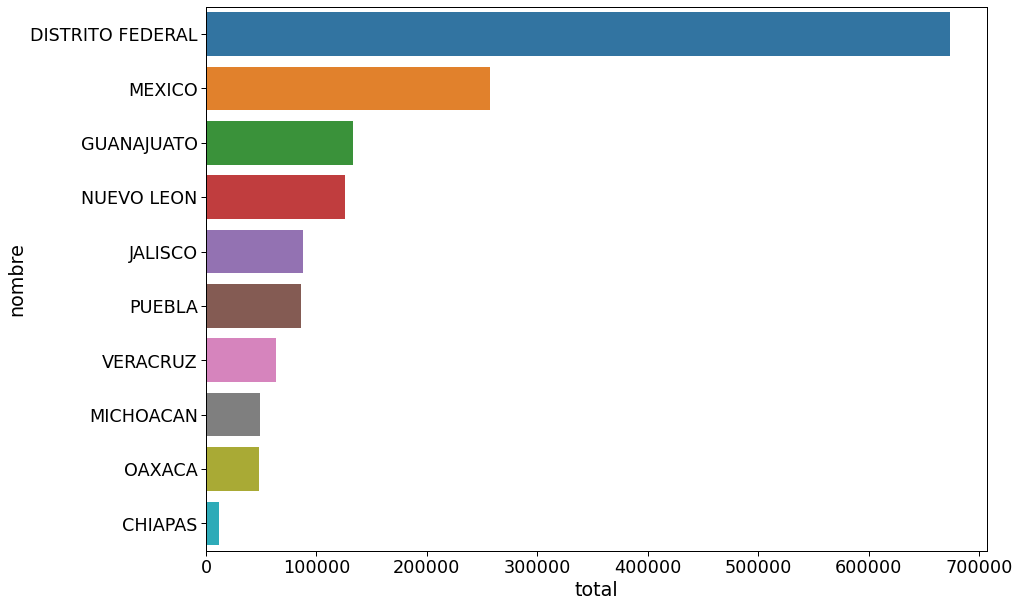

In [23]:
plt.figure(figsize=(14,10))
top10=dfcases.nlargest(10,'poblacion').copy()
top10.sort_values('total', inplace=True , ascending=False)
sns.barplot(x="total", y="nombre", data=top10)
sns.set_context('paper',font_scale=2)

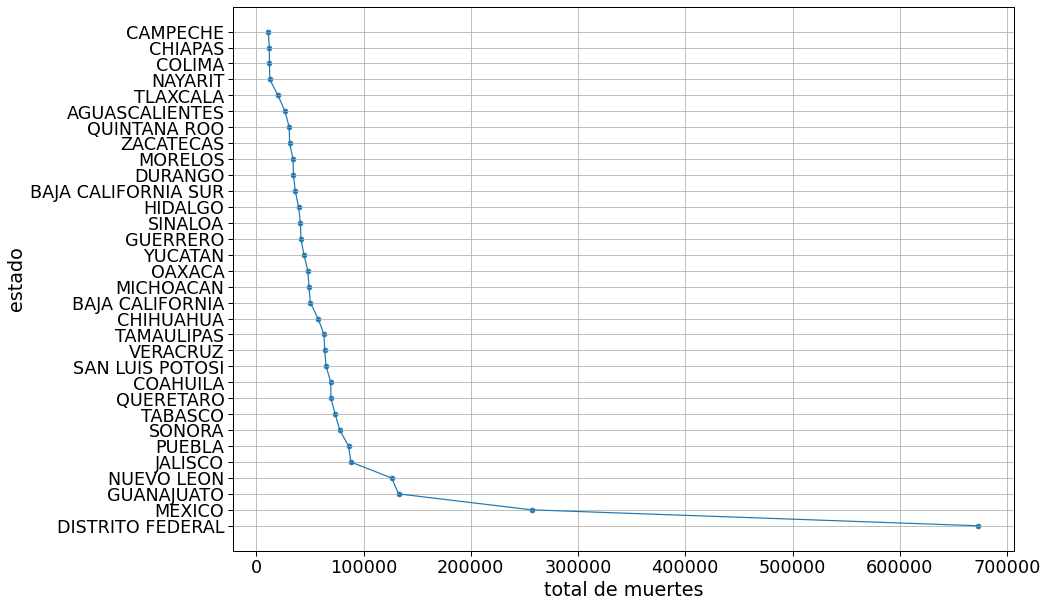

In [24]:
fig = plt.figure(figsize=(14,10))
plt.scatter(dfcases['total'],dfcases['nombre'])
plt.plot(dfcases['total'],dfcases['nombre'])
plt.xlabel('total de muertes')
plt.ylabel('estado')
plt.grid()


In [25]:
dfcases.keys()

Index(['cve_ent', 'poblacion', 'nombre', '31-12-2019', '01-01-2020',
       '02-01-2020', '03-01-2020', '04-01-2020', '05-01-2020', '06-01-2020',
       ...
       '13-06-2021', '14-06-2021', '15-06-2021', '16-06-2021', '17-06-2021',
       '18-06-2021', '19-06-2021', '20-06-2021', 'total', 'rates'],
      dtype='object', length=543)

In [26]:
X = dfcases.iloc[:,:-1].values  #independent variable array
y = dfcases.iloc[:,1].values  #dependent variable vector

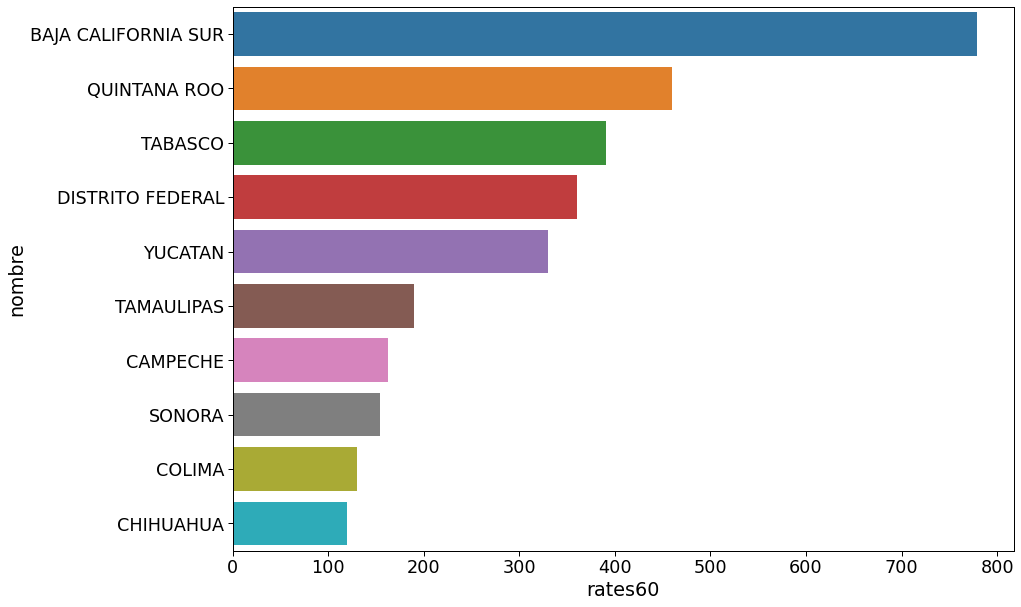

In [27]:
dfcases['total60']= dfcases.iloc[:, b -59 : b ].sum(axis=1)
dfcases['rates60'] = (dfcases['total60']/dfcases['poblacion'])*100000
dfcases
plt.figure(figsize=(14,10))
sns.barplot(x="rates60", y="nombre", data=dfcases.nlargest(10, 'rates60'))
sns.set_context('paper', font_scale=2)

In [29]:
dfAll = pd.merge(dfcases,dfdeaths,on='nombre')
dfAll

,cve_ent_x,poblacion_x,nombre,31-12-2019,01-01-2020,02-01-2020,03-01-2020,04-01-2020,05-01-2020,06-01-2020,...,14/06/2021,15/06/2021,16/06/2021,17/06/2021,18/06/2021,19/06/2021,total_y,rates_y,total60_y,rates60_y
0,9,9018645,DISTRITO FEDERAL,0,0,0,0,0,0,0,...,8,5,6,9,2,0,34458,382.075134,640,7.096410
1,15,17427790,MEXICO,0,0,0,0,0,0,0,...,3,6,4,4,2,2,37207,213.492359,727,4.171499
2,11,6228175,GUANAJUATO,0,0,0,0,0,0,0,...,0,2,0,1,1,0,11079,177.885175,117,1.878560
3,19,5610153,NUEVO LEON,0,0,0,0,0,0,0,...,2,2,4,2,0,0,9692,172.758212,206,3.671914
4,14,8409693,JALISCO,0,0,0,0,0,0,0,...,0,3,1,1,1,0,12604,149.874674,264,3.139235
5,21,6604451,PUEBLA,0,0,0,0,0,0,0,...,4,7,4,4,2,0,12171,184.284810,531,8.040032
6,26,3074745,SONORA,0,0,0,0,0,0,0,...,4,7,2,1,2,0,6739,219.172647,144,4.683315
7,27,2572287,TABASCO,0,0,0,0,0,0,0,...,2,2,2,2,1,1,4234,164.600606,174,6.764408
8,22,2279637,QUERETARO,0,0,0,0,0,0,0,...,1,0,0,0,0,0,4452,195.294251,143,6.272929
9,5,3218720,COAHUILA,0,0,0,0,0,0,0,...,0,0,1,0,0,0,6376,198.091167,67,2.081573


In [32]:
dfAll.head().loc[:, ['nombre', 'total_x', 'rates_x', 'total60_x', 'rates60_x', 'total_y', 'rates_y', 'total60_y', 'rates60_y']]

,nombre,total_x,rates_x,total60_x,rates60_x,total_y,rates_y,total60_y,rates60_y
0,DISTRITO FEDERAL,673343,7466.121574,32484,360.187146,34458,382.075134,640,7.096410
1,MEXICO,256656,1472.682423,8519,48.881700,37207,213.492359,727,4.171499
2,GUANAJUATO,132650,2129.837392,2282,36.639947,11079,177.885175,117,1.878560
3,NUEVO LEON,126068,2247.140140,4716,84.061879,9692,172.758212,206,3.671914
4,JALISCO,88130,1047.957399,2895,34.424562,12604,149.874674,264,3.139235


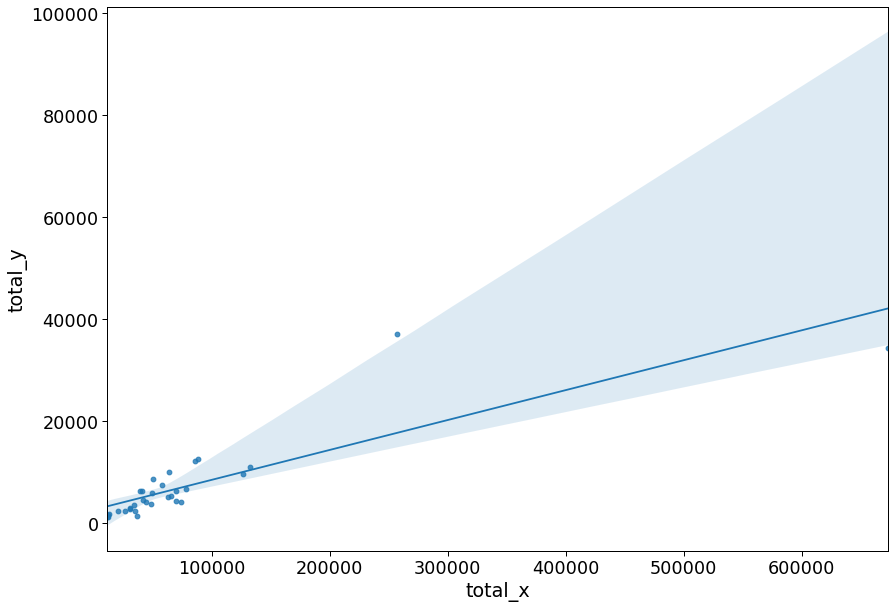

In [33]:
plt.figure(figsize=(14,10))
sns.regplot(x="total_x", y="total_y", data=dfAll)
sns.set_context('paper', font_scale=2)

In [34]:
dfFinal = dfAll.loc[:,['nombre','poblacion_x','total_x','rates_x','rates60_x','total_y','rates_y','rates60_y']].copy()

In [35]:
dfFinal

,nombre,poblacion_x,total_x,rates_x,rates60_x,total_y,rates_y,rates60_y
0,DISTRITO FEDERAL,9018645,673343,7466.121574,360.187146,34458,382.075134,7.096410
1,MEXICO,17427790,256656,1472.682423,48.881700,37207,213.492359,4.171499
2,GUANAJUATO,6228175,132650,2129.837392,36.639947,11079,177.885175,1.878560
3,NUEVO LEON,5610153,126068,2247.140140,84.061879,9692,172.758212,3.671914
4,JALISCO,8409693,88130,1047.957399,34.424562,12604,149.874674,3.139235
5,PUEBLA,6604451,85945,1301.319368,43.576673,12171,184.284810,8.040032
6,SONORA,3074745,77824,2531.071682,154.289217,6739,219.172647,4.683315
7,TABASCO,2572287,73463,2855.941036,390.547400,4234,164.600606,6.764408
8,QUERETARO,2279637,69561,3051.406869,96.155660,4452,195.294251,6.272929
9,COAHUILA,3218720,69382,2155.577372,41.755729,6376,198.091167,2.081573


In [40]:
dfFinal.rename(columns = {'nombre': 'state', 'poblacion_x': 'population','rates_x': 'cases_rates','total_x': 'total_cases','total_y':'total_deaths', 'rates60_x' : 'rates_cases60','rates60_y' : 'rates_deaths60', 'rates_y':'rates_deaths'}, inplace=True)
dfFinal.sort_values(by=['state'], ascending = True, inplace=True)
dfFinal

,state,population,total_cases,cases_rates,rates_cases60,total_deaths,rates_deaths,rates_deaths60
26,AGUASCALIENTES,1434635,26694,1860.682334,55.275384,2456,171.193370,5.924852
14,BAJA CALIFORNIA,3634868,50278,1383.213916,64.624080,8648,237.917856,4.786969
21,BAJA CALIFORNIA SUR,804708,36223,4501.384353,778.667542,1486,184.663257,14.415167
31,CAMPECHE,1000617,11081,1107.416724,162.699614,1265,126.421998,5.596547
30,CHIAPAS,5730367,12050,210.283216,19.108724,1654,28.863771,0.715486
13,CHIHUAHUA,3801487,57483,1512.118810,119.505867,7493,197.107079,10.758948
9,COAHUILA,3218720,69382,2155.577372,41.755729,6376,198.091167,2.081573
29,COLIMA,785153,12203,1554.219369,130.547804,1210,154.110091,4.330366
0,DISTRITO FEDERAL,9018645,673343,7466.121574,360.187146,34458,382.075134,7.096410
22,DURANGO,1868996,34588,1850.619263,63.403025,2495,133.494133,3.691822


In [41]:
dfFinal.to_csv('../data/week1analyzes.csv',index=False)